# Retail Forecasting

## Problem Statement:
The large company who is into beverages business in Australia. They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality. They needed forecast of each of products at item level every week in weekly buckets.

In [12]:
import numpy as np
import pandas as pd
import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
forecast = pd.read_csv('./Data/newForecast.csv')
forecast.head(3)

,Unnamed: 0,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7


In [3]:
forecast['date'] = pd.to_datetime(forecast['date'])

In [4]:
forecast.drop('Unnamed: 0', axis=1, inplace=True)
forecast.head(3)

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7


In [5]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product          1218 non-null   object        
 1   date             1218 non-null   datetime64[ns]
 2   Sales            1218 non-null   int64         
 3   Discount         1218 non-null   float64       
 4   In-Store Promo   1218 non-null   int64         
 5   Catalogue Promo  1218 non-null   int64         
 6   Store End Promo  1218 non-null   int64         
 7   Google_Mobility  1218 non-null   float64       
 8   Covid_Flag       1218 non-null   int64         
 9   V_DAY            1218 non-null   int64         
 10  EASTER           1218 non-null   int64         
 11  CHRISTMAS        1218 non-null   int64         
 12  DayOfWeek        1218 non-null   object        
 13  Quarter          1218 non-null   int64         
 14  WeekNum          1218 non-null   int64  

# Add Year and Month

In [6]:
forecast['Year'] = forecast['date'].dt.year
forecast['Month'] = forecast['date'].dt.month
forecast.head(3)

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum,Year,Month
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5,2017,2
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6,2017,2
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7,2017,2


# Modeling

In [7]:
forecast = forecast[["Product", "date", "Sales"]]
forecast.head()

,Product,date,Sales
0,SKU1,2017-02-05,27750
1,SKU1,2017-02-12,29023
2,SKU1,2017-02-19,45630
3,SKU1,2017-02-26,26789
4,SKU1,2017-03-05,41999


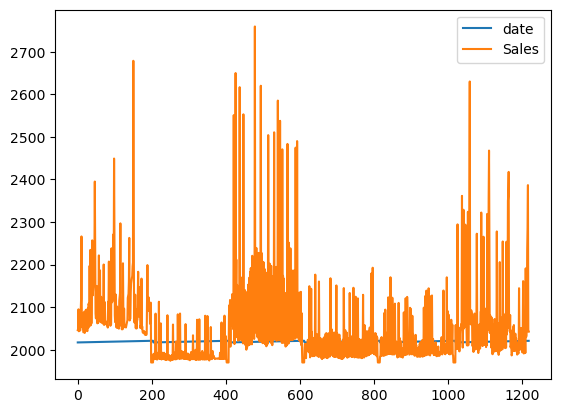

In [8]:
forecast.plot()
plt.show()

In [9]:
#seperate by product

product1 = forecast[forecast["Product"] == "SKU1"]
product2 = forecast[forecast["Product"] == "SKU2"]
product3 = forecast[forecast["Product"] == "SKU3"]
product4 = forecast[forecast["Product"] == "SKU4"]
product5 = forecast[forecast["Product"] == "SKU5"]
product6 = forecast[forecast["Product"] == "SKU6"]

I will focus on product 1 for simplicity for now

In [10]:
product1.head()

,Product,date,Sales
0,SKU1,2017-02-05,27750
1,SKU1,2017-02-12,29023
2,SKU1,2017-02-19,45630
3,SKU1,2017-02-26,26789
4,SKU1,2017-03-05,41999


# Linear Regression

 This is my base model.

In [23]:
from sklearn.linear_model import LinearRegression
#prod = product1.copy()
X = product1[["Sales"]]
y = product1["date"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, random_state=42)

# fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict on the same period
preds = lr.predict(X_test)

#Evaluations 
#mean squared error
mse = mean_squared_error(X_test, preds)

#root mean squared error
rmse = np.sqrt(mse)

#mean absolut Error 
mae = mean_absolute_error(X_test, preds)

#Print 
print('Mean Absolute Error: %f' % mae)
print("Mean Squared Error: %.3f" % mse)
print('Root Mean Squared Error: %.3f' % rmse)

Mean Absolute Error: 1547278287089342208.000000
Mean Squared Error: 2394074805208113664179167462942572544.000
Root Mean Squared Error: 1547279808311384064.000


# ARIMA

## Stat test if it is stationary or not  using Augmented Dickey-Fuller Test

In [ ]:
# ADF Test
# Function to print out results in customised manner
def adf_test(df):
    
    df.index = df['date']

    # Check the data type
    del df['date']
    del df["Product"]
    # View the dataset
    #df.head()
    
    timeseries = df["Sales"]
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#product 1
adf_test(product1)

In [ ]:
# Product 2
adf_test(product2)

In [ ]:
# Product 3
adf_test(product3)

In [ ]:
# Product 4
adf_test(product4)

In [ ]:
# Product 5
adf_test(product5)

In [ ]:
# Product 6
adf_test(product6)

## All of the products are stationary based on the Augmented Dickey-Fuller Test.

## ARIMA Model

In [ ]:
#Train/test split
#X = product1.values
#size = int(len(X) * 0.60)
#X_train, X_test = X[0:size], X[size:len(X)]
X_train, X_test = train_test_split(product1.values, train_size=0.66, random_state=42)

history = [x for x in X_train]
predictions = list()


# walk-forward validation
for x in range(len(X_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = X_test[x]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


In [ ]:
#predicted=995.744348, expected=0.000000
#predicted=995.744348, expected=0.000000
# evaluate forecasts

#Forecast Error (or Residual Forecast Error)
forecast_errors = [X_test[i]-predictions[i] for i in range(len(X_test))]

#forecast bias
bias =  np.mean(forecast_errors)

#mean squared error
mse = mean_squared_error(X_test, predictions)

#root mean squared error
rmse = np.sqrt(mse)

#mean absolut Error 
mae = mean_absolute_error(X_test, predictions)

#Print 
#print('Forecast Errors: %s' % forecast_errors)
print('Forecasting Bias or Mean Forecast Error: %f' % bias)
print('Mean Absolute Error: %f' % mae)
print("Mean Squared Error: %.3f" % mse)
print('Root Mean Squared Error: %.3f' % rmse)

Based on the <b>forecasting bias</b> the model is under forecasting. 

Based on the <b>Mean Absolute Error</b>, it is really high. The closer to 0 the better the model can be. 

The model has a high <b>Mean Squared Error</b>. A mean squared error of zero indicates perfect skill, or no error.

The model has a high <b>Root Mean Squared Error</b>.As with the mean squared error, an RMSE of zero indicates no error.

In [ ]:
"""from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

#param_grid = {history order=(5,1,0)}

gsc = GridSearchCV(model, param_grid=(5,1,0), scoring='neg_mean_absolute_error', 
                   cv=TimeSeriesSplit(n_splits=2).split(X))"""

"""
gsc = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_absolute_error', 
                   cv=TimeSeriesSplit(n_splits=2).split(X))
"""

In [ ]:
print(model_fit.summary())

In [ ]:

# plot forecasts against actual outcomes
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

# ARMA

# Autoregression (AR)

# Moving Average (MA)

# Seasonal Autoregressive Integrated Moving-Average (SARIMA)